<a href="https://colab.research.google.com/github/rdose/ia3-batmobile/blob/main/Ejercicio_batmobile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

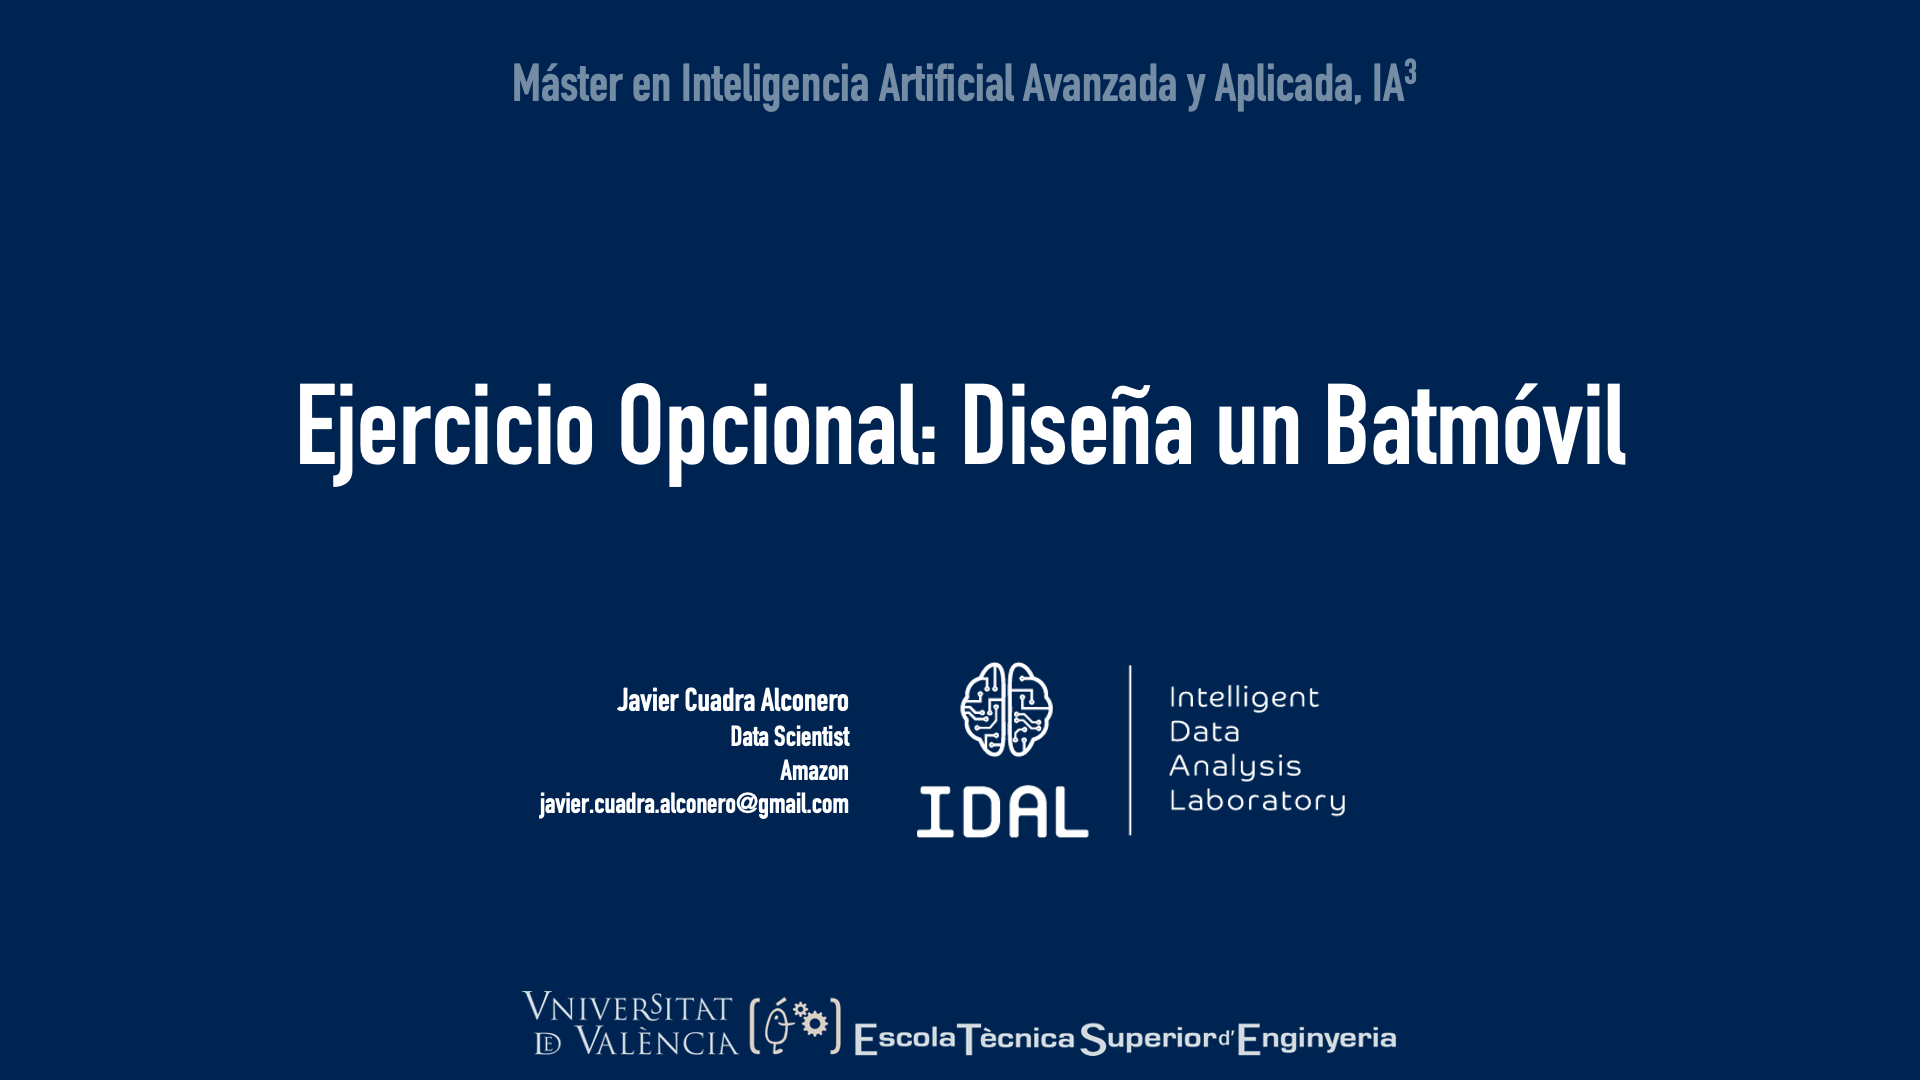

# Consideraciones:

- Se trata de un ejercicio opcional a realizar en grupos de tres
- El entregable de este ejercicio debe ser un link a vuestro cuaderno de colaboratory alojado en Github
- La evaluación del ejercicio será una ejecución del cuaderno
- Todos los métodos descritos deben imprimir un resultado en pantalla
- Aquellos que completen el sistema discreto recibirán un punto extra en este módulo
- **Se dispone de un total de dos semanas para terminar el ejercicio**

Este ejercicio se propone dada la importancia de la programación orientada a objetos en el lenguaje Python. Gran parte de las librerías utilizadas en ML y DL requieren de un conocimiento básico de este paradigma para poder sacarles provecho y modelar de forma apropiada. Debido a este se propone este ejercicio para motivar a los alumnos a familiarizarse con esta tecnología.

# Exercise 1
Hi Guys Cristopher Nolan is here. Don't talk about this, but I am making a new Batman movie and I need your help to design the new Batmobile. For this ocassion I would like you to design it as several Python Classes.

- Design the main Batmobile class with the following attributes: Pilot (It could be Batman or Robin), number of batrockets loaded, number of pem (this are electromagnetic pulses to counter the Joker weapons) uses left, liters of gas left in the batmobile

- Add the following methods to the Batmobile class: A method to accelerate the batmobile and drive for some distance, a method to activate the turbo and drive for some distance faster than the normal method, a method to launch a rocket to a Joker colleague, a method to launch a pem use.

- Create the following classes to interact with the Batmobile: Joker, Joker Villain, Rocket, PEM Pulse.

- The Joker and Jokker Villain class should have a parameter called KO which will turn to True when they receive a Rocket. They also have a parameter called Weapon which should turn to false if they receive a PEM Pulse. 

- The Rocket and PEM Pulse are the ammunition of the Batmobile, the car can only use the weapons if it has ammunition in the arsenal.

- <font color="red"> **Finally draw a diagram of the classes using diagram.io showing how they interact.** </font>

Se propone la siguiente distribución de la carga de trabajo:
- Un estudiante podría diseñar la clase del batmóvil. Mientras sus dos compañeros podrían desarrollar las clases relacionadas con el armamento del mismo y los distintos villanos descritos.
- Una vez desarrolladas las piezas de código por separado se procedería a la integración en equipo de todo el sistema.
- Uno de los estudiantes (aquel con menor carga en programación) desarrollaría el diagrama de la pieza de software.

##Classes diagram
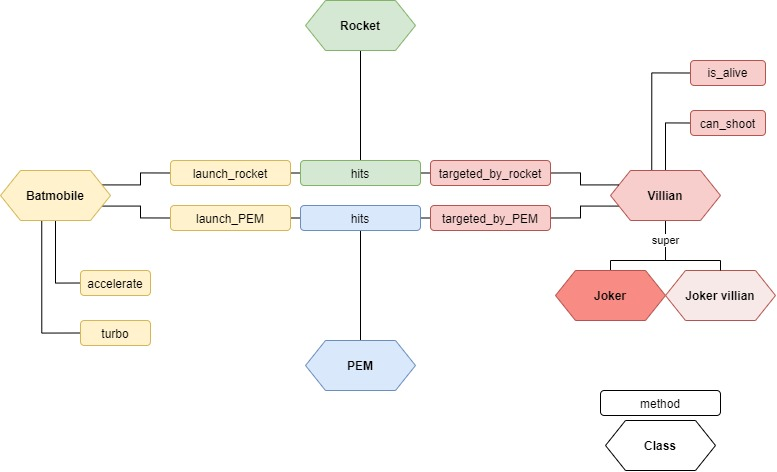

In [2]:
from numpy.random import choice

##Class Rocket

In [3]:
class Rocket:
  def __init__(self, max_distance=15, rocket_type = choice(["fire", "ice", "rope"]), debug=False):
    self.max_distance = max_distance
    self.rocket_type = rocket_type
    if debug:
      print("This rocket can hit enemies within {} meters. It will be a {} rocket".format(self.max_distance, self.rocket_type))
  def hits(self):
    return choice([1, 0])
        
class PEM_pulse:
  def __init__(self, max_distante=5, debug=False):
    self.max_distance = max_distante
    if debug:
      print("This PEM can hit enemies within {} meters. It will deactivate enemies weapons". format(self.max_distance))
  def hits(self):
    return choice([1, 0])

###Rocket and PEM test

In [6]:
r = Rocket(rocket_type="stunning", debug=True)
p = PEM_pulse(debug=True)

This rocket can hit enemies within 15 meters. It will be a stunning rocket
This PEM can hit enemies within 5 meters. It will deactivate enemies weapons


##Class villain

In [7]:
class Batman_enemy:
    def __init__(self):
        self.ko = False
        self.weapon_active = True
        self.name = "INVALID"

    def targeted_by_rocket(self, rocket):
        if rocket.hits():
            self.ko = True

    def targeted_by_PEM(self, pem):
        if pem.hits() & (not self.ko) & self.weapon_active:
            self.weapon_active = False
    
    def is_alive(self):
        return not self.ko

    def can_shoot(self):
        return self.weapon_active

class Joker(Batman_enemy):
    def __init__(self):
        super().__init__()
        self.name = "Joker"
class JokerVillains(Batman_enemy):
    def __init__(self):
        super().__init__()
        self.name = "Villain"

###Villain test

In [8]:
actors = [JokerVillains()]*10
actors.append(Joker())
for a in actors:
    print(a.name, "Is alive" if a.is_alive() else "Is dead")

Villain Is alive
Villain Is alive
Villain Is alive
Villain Is alive
Villain Is alive
Villain Is alive
Villain Is alive
Villain Is alive
Villain Is alive
Villain Is alive
Joker Is alive


##Class Batmobile

In [9]:
'''
Class Batmobile
args=
  driver: 

'''

class Batmobile:
  def __init__(self, driver,  speed = 0, gas_left=50, turbo_left=10, rockets_left=[], PEMs_left=[]):
    if driver=="Batman" or driver=="Robin":
      self.driver = driver
      self.speed = speed
      self.gas_left = gas_left
      self.turbo_left = turbo_left
      self.rockets_left = rockets_left
      self.PEMs_left = PEMs_left
      print("Wellcome to the Batmobile {}. Your speed is {}, you have {} l of gas left, {} uses of turbo left, {} rockets and {} PEMs launchs left"
      .format(self.driver, self.speed, self.gas_left, self.turbo_left, len(self.rockets_left), len(self.PEMs_left)))
    else:
      raise Exception("Unknown driver. Ejecting seat...")

  def accelerate(self):
    if self.gas_left >= 10:
      self.speed += 10
      self.gas_left -= 10
      print("Accelearting, current speed: {}, gas left: {}".format(self.speed, self.gas_left))
      if self.gas_left <= 20:
        print("Care {}, you re running out of gas".format(self.driver))
    else:
      print("No gas left. When was the last time you got gas {}?".format(self.driver))
    

  def turbo(self):
    if self.turbo_left >= 1:
      self.speed += 30
      self.turbo_left -= 1
      print("Let's go faster! Current speed: {}, turbo left: {}".format(self.speed, self.turbo_left))
      if self.turbo_left <=3:
        print("Control yourself {}, we can't waste turbo".format(self.driver))
    else:
      print("We're out of turbo. Alfred will get angry".format(self.speed, self.gas_left))

  def launch_rocket(self, villain):
    if len(self.rockets_left) > 0:
      villain.targeted_by_rocket(self.rockets_left.pop())
      print("The {} is targeted, {} rockets letf, let's see if {} stils alive".format(villain.name, len(self.rockets_left), villain.name))
      if villain.is_alive():
        print("Failed rocket. {}, you have to improve your aiming skills.".format(self.driver))
      else:
        print("Good job! {} get down.".format(villain.name))
    else:
      print("No rockets left! Try something else {}". format(self.driver))

  def launch_PEM(self, villain):
    if len(self.PEMs_left) > 0:
      villain.targeted_by_PEM(self.PEMs_left.pop())
      print("The {} is targeted, {} PEMs uses letf, let's see if {} stil can shoot us".format(villain.name, len(self.PEMs_left), villain.name))
      if villain.can_shoot():
        print("PEM didn't worked. The {} can still hit you, care {}!".format(villain.name, self.driver))
      else:
        print("Nice shot! The {} won't shoot us in a while".format(villain.name))
    else:
      print("No PEM uses left! Prepare for dodge bullets {}". format(self.driver))

###Batmobile test:
1. Test Drivers:
2. Test accelerate and turbo
3. Test launch_orcket and launch_PEM

In [10]:
#1) Test drivers
bm = Batmobile("Batman")
bm = Batmobile("Robin")
bm = Batmobile("Pengüin")

Wellcome to the Batmobile Batman. Your speed is 0, you have 50 l of gas left, 10 uses of turbo left, 0 rockets and 0 PEMs launchs left
Wellcome to the Batmobile Robin. Your speed is 0, you have 50 l of gas left, 10 uses of turbo left, 0 rockets and 0 PEMs launchs left


Exception: ignored

In [11]:
#2) Test accelerate and turbo
bm = Batmobile("Robin")
print("##### ACCELERATE")
bm_a = [bm.accelerate() for _ in range(6)]
print("##### TURBO:")
bm_t = [bm.turbo() for _ in range(11)]

Wellcome to the Batmobile Robin. Your speed is 0, you have 50 l of gas left, 10 uses of turbo left, 0 rockets and 0 PEMs launchs left
##### ACCELERATE
Accelearting, current speed: 10, gas left: 40
Accelearting, current speed: 20, gas left: 30
Accelearting, current speed: 30, gas left: 20
Care Robin, you re running out of gas
Accelearting, current speed: 40, gas left: 10
Care Robin, you re running out of gas
Accelearting, current speed: 50, gas left: 0
Care Robin, you re running out of gas
No gas left. When was the last time you got gas Robin?
##### TURBO:
Let's go faster! Current speed: 80, turbo left: 9
Let's go faster! Current speed: 110, turbo left: 8
Let's go faster! Current speed: 140, turbo left: 7
Let's go faster! Current speed: 170, turbo left: 6
Let's go faster! Current speed: 200, turbo left: 5
Let's go faster! Current speed: 230, turbo left: 4
Let's go faster! Current speed: 260, turbo left: 3
Control yourself Robin, we can't waste turbo
Let's go faster! Current speed: 290, 

## Classes interaction test

In [12]:
#3) Test launch_rocket() and launch_PEM()
print("##### UGLY PEOPLE")
actors = [JokerVillains() for _ in range(5)]
actors.append(Joker())
a_l = [print(a.name, "is alive" if a.is_alive() else "is dead")  for a in actors]
print("##### OUR HERO")
bm = Batmobile("Batman", rockets_left=[Rocket() for i in range(5)], PEMs_left=[PEM_pulse() for j in range(2)])
print("##### LAUNCH ROCKET")
bm_r = [bm.launch_rocket(a) for a in actors]
print("##### LAUNCH PEM:")
bm_p = [bm.launch_PEM(a) for a in actors]

##### UGLY PEOPLE
Villain is alive
Villain is alive
Villain is alive
Villain is alive
Villain is alive
Joker is alive
##### OUR HERO
Wellcome to the Batmobile Batman. Your speed is 0, you have 50 l of gas left, 10 uses of turbo left, 5 rockets and 2 PEMs launchs left
##### LAUNCH ROCKET
The Villain is targeted, 4 rockets letf, let's see if Villain stils alive
Failed rocket. Batman, you have to improve your aiming skills.
The Villain is targeted, 3 rockets letf, let's see if Villain stils alive
Failed rocket. Batman, you have to improve your aiming skills.
The Villain is targeted, 2 rockets letf, let's see if Villain stils alive
Failed rocket. Batman, you have to improve your aiming skills.
The Villain is targeted, 1 rockets letf, let's see if Villain stils alive
Good job! Villain get down.
The Villain is targeted, 0 rockets letf, let's see if Villain stils alive
Good job! Villain get down.
No rockets left! Try something else Batman
##### LAUNCH PEM:
The Villain is targeted, 1 PEMs uses